In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
from IPython.display import display
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
data_train = pd.read_csv('tech_challenge2021_train.csv')
data_train.head()

Well Identifier  Measured Depth m  Weight on Bit kkgf  \
0  USROP_A 0 N-NA_F-9_Ad           491.033            5.842270   
1  USROP_A 0 N-NA_F-9_Ad           491.185            6.241431   
2  USROP_A 0 N-NA_F-9_Ad           491.222            6.241431   
3  USROP_A 0 N-NA_F-9_Ad           491.338            6.368437   
4  USROP_A 0 N-NA_F-9_Ad           491.341            6.368437   

   Average Standpipe Pressure kPa  Average Surface Torque kN.m  \
0                     9440.922214                     0.244047   
1                     9499.941336                     0.244047   
2                     9499.941336                     0.244047   
3                     9313.024466                     0.216931   
4                     9313.024466                     0.216931   

   Rate of Penetration m/h  Average Rotary Speed rpm  Mud Flow In L/min  \
0                42.864024                      84.0        2784.321942   
1                42.315384                      84.0        2784.321942   
2                42.315384                      84.0        2784.321942   
3                42.894504                      84.0        2784.321942   
4                42.894504                      84.0        2784.321942   

   Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
0                  1.21       311.15              93.780222   
1                  1.21       311.15              93.979803   
2                  1.21       311.15              93.979803   
3                  1.21       311.15              94.079593   
4                  1.21       311.15              94.079593   

   Hole Depth (TVD) m  USROP Gamma gAPI  
0          490.760309            150.88  
1          490.910880            150.88  
2          490.910880            150.88  
3          491.061756            146.26  
4          491.061756            146.26

In [7]:
data_test = pd.read_csv('tech_challenge2021_test.csv')
data_test.head()

Well Identifier  Measured Depth m  Weight on Bit kkgf  \
0      TC-2021-TW           365.150           10.656246   
1      TC-2021-TW           365.303           10.656246   
2      TC-2021-TW           365.455           10.656246   
3      TC-2021-TW           365.608           10.656246   
4      TC-2021-TW           365.760           10.656246   

   Average Standpipe Pressure kPa  Average Surface Torque kN.m  \
0                      23053.9448                    22.631313   
1                      23053.9448                    22.631313   
2                      23053.9448                    22.631313   
3                      23053.9448                    22.631313   
4                      23053.9448                    22.631313   

   Average Rotary Speed rpm  Mud Flow In L/min  Mud Density In g/cm3  \
0                   169.781        3491.436904                  1.31   
1                   169.781        3491.436904                  1.31   
2                   169.781        3491.436904                  1.31   
3                   169.781        3491.436904                  1.31   
4                   169.781        3491.436904                  1.31   

   Diameter mm  Average Hookload kkgf  Hole Depth (TVD) m  USROP Gamma gAPI  
0        254.0             136.662392          365.124187            20.774  
1        254.0             136.662392          365.276587            20.774  
2        254.0             136.662392          365.428682            20.774  
3        254.0             136.662392          365.581082            20.774  
4        254.0             136.662392          365.733178            20.774

In [8]:
data_train.shape
data_test.shape

(198928, 13)

(114299, 12)

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198928 entries, 0 to 198927
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Well Identifier                 198928 non-null  object 
 1   Measured Depth m                198928 non-null  float64
 2   Weight on Bit kkgf              198928 non-null  float64
 3   Average Standpipe Pressure kPa  198928 non-null  float64
 4   Average Surface Torque kN.m     198928 non-null  float64
 5   Rate of Penetration m/h         198928 non-null  float64
 6   Average Rotary Speed rpm        198928 non-null  float64
 7   Mud Flow In L/min               198928 non-null  float64
 8   Mud Density In g/cm3            198928 non-null  float64
 9   Diameter mm                     198928 non-null  float64
 10  Average Hookload kkgf           198928 non-null  float64
 11  Hole Depth (TVD) m              198928 non-null  float64
 12  USROP Gamma gAPI

In [10]:
data_train.describe()
data_train.describe(include=['O'])

Measured Depth m  Weight on Bit kkgf  Average Standpipe Pressure kPa  \
count     198928.000000       198928.000000                   198928.000000   
mean        2411.781370            6.087997                    17451.302922   
std         1066.443448            3.957126                     4236.531326   
min          225.171000            0.001814                     1432.661618   
25%         1548.686750            3.283486                    14655.999760   
50%         2697.182500            5.190356                    16683.999630   
75%         3288.946500            8.127138                    21153.529060   
max         4090.001000           31.411272                    24998.459410   

       Average Surface Torque kN.m  Rate of Penetration m/h  \
count                198928.000000            198928.000000   
mean                     14.430343                24.978426   
std                       7.239629                15.086731   
min                       0.008135                 0.330000   
25%                       9.639866                12.990000   
50%                      12.798921                21.090000   
75%                      17.815448                32.470001   
max                      36.489128                99.206304   

       Average Rotary Speed rpm  Mud Flow In L/min  Mud Density In g/cm3  \
count             198928.000000      198928.000000         198928.000000   
mean                 152.368019        2873.576072              4.008286   
std                   49.998842        1055.406219              4.496288   
min                    0.000000         185.420836              1.020000   
25%                  129.250000        1993.927917              1.300000   
50%                  139.736000        2121.382739              1.350000   
75%                  179.283000        3987.855834             10.849026   
max                  311.230011        4538.450195             12.017384   

         Diameter mm  Average Hookload kkgf  Hole Depth (TVD) m  \
count  198928.000000          198928.000000       198928.000000   
mean      297.470693             127.503708         2153.624785   
std       100.344171              15.551890          846.519288   
min       215.900000              84.047945          225.162770   
25%       215.900000             124.925435         1516.593360   
50%       215.900000             130.905851         2528.949222   
75%       444.500000             138.719433         2865.091577   
max       444.500000             152.926842         3248.389893   

       USROP Gamma gAPI  
count     198928.000000  
mean          67.197939  
std           50.519888  
min            0.000000  
25%           25.380000  
50%           54.490000  
75%           98.140000  
max          260.899000

Well Identifier
count                 198928
unique                     7
top     USROP_A 3 N-SH-F-15d
freq                   53041

In [11]:
# Checking for null values
data_train.isnull().sum()

Well Identifier                   0
Measured Depth m                  0
Weight on Bit kkgf                0
Average Standpipe Pressure kPa    0
Average Surface Torque kN.m       0
Rate of Penetration m/h           0
Average Rotary Speed rpm          0
Mud Flow In L/min                 0
Mud Density In g/cm3              0
Diameter mm                       0
Average Hookload kkgf             0
Hole Depth (TVD) m                0
USROP Gamma gAPI                  0
dtype: int64

In [12]:
data_test.isnull().sum()

Well Identifier                   0
Measured Depth m                  0
Weight on Bit kkgf                0
Average Standpipe Pressure kPa    0
Average Surface Torque kN.m       0
Average Rotary Speed rpm          0
Mud Flow In L/min                 0
Mud Density In g/cm3              0
Diameter mm                       0
Average Hookload kkgf             0
Hole Depth (TVD) m                0
USROP Gamma gAPI                  0
dtype: int64

In [13]:
# Checking for duplicate values (Row-wise)
data_train[data_train.duplicated()]

Well Identifier  Measured Depth m  Weight on Bit kkgf  \
32432   USROP_A 2 N-SH_F-14d          1640.906            5.414693   
61597   USROP_A 2 N-SH_F-14d          3181.932           12.430340   
106554  USROP_A 3 N-SH-F-15d          3265.127            6.959468   
113663  USROP_A 3 N-SH-F-15d          3713.503           14.117155   

        Average Standpipe Pressure kPa  Average Surface Torque kN.m  \
32432                      14977.99988                    12.399999   
61597                      17566.00037                    13.360000   
106554                     14710.47490                    25.130086   
113663                     15721.03947                    28.679617   

        Rate of Penetration m/h  Average Rotary Speed rpm  Mud Flow In L/min  \
32432                 34.270001                160.949997        3964.520018   
61597                 28.370001                168.929993        1940.489990   
106554                19.685508                139.736000        2077.184268   
113663                29.712818                139.736000        2077.184268   

        Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
32432               1.260000        444.5             128.953311   
61597               1.380000        215.9             138.834356   
106554             11.182843        215.9             128.411093   
113663             11.266297        215.9             130.877274   

        Hole Depth (TVD) m  USROP Gamma gAPI  
32432          1640.416226            99.485  
61597          2920.275084            53.588  
106554         2851.333896            35.579  
113663         2950.541724            61.341

In [14]:
# Checking for duplicate values (Column-Wise)
data_train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [15]:
df_train = data_train.drop(['Well Identifier'], axis = 1)
df_train.head()

Measured Depth m  Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0           491.033            5.842270                     9440.922214   
1           491.185            6.241431                     9499.941336   
2           491.222            6.241431                     9499.941336   
3           491.338            6.368437                     9313.024466   
4           491.341            6.368437                     9313.024466   

   Average Surface Torque kN.m  Rate of Penetration m/h  \
0                     0.244047                42.864024   
1                     0.244047                42.315384   
2                     0.244047                42.315384   
3                     0.216931                42.894504   
4                     0.216931                42.894504   

   Average Rotary Speed rpm  Mud Flow In L/min  Mud Density In g/cm3  \
0                      84.0        2784.321942                  1.21   
1                      84.0        2784.321942                  1.21   
2                      84.0        2784.321942                  1.21   
3                      84.0        2784.321942                  1.21   
4                      84.0        2784.321942                  1.21   

   Diameter mm  Average Hookload kkgf  Hole Depth (TVD) m  USROP Gamma gAPI  
0       311.15              93.780222          490.760309            150.88  
1       311.15              93.979803          490.910880            150.88  
2       311.15              93.979803          490.910880            150.88  
3       311.15              94.079593          491.061756            146.26  
4       311.15              94.079593          491.061756            146.26

In [16]:
df_test = data_test.drop(['Well Identifier'], axis = 1)
df_test.head()

Measured Depth m  Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0           365.150           10.656246                      23053.9448   
1           365.303           10.656246                      23053.9448   
2           365.455           10.656246                      23053.9448   
3           365.608           10.656246                      23053.9448   
4           365.760           10.656246                      23053.9448   

   Average Surface Torque kN.m  Average Rotary Speed rpm  Mud Flow In L/min  \
0                    22.631313                   169.781        3491.436904   
1                    22.631313                   169.781        3491.436904   
2                    22.631313                   169.781        3491.436904   
3                    22.631313                   169.781        3491.436904   
4                    22.631313                   169.781        3491.436904   

   Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
0                  1.31        254.0             136.662392   
1                  1.31        254.0             136.662392   
2                  1.31        254.0             136.662392   
3                  1.31        254.0             136.662392   
4                  1.31        254.0             136.662392   

   Hole Depth (TVD) m  USROP Gamma gAPI  
0          365.124187            20.774  
1          365.276587            20.774  
2          365.428682            20.774  
3          365.581082            20.774  
4          365.733178            20.774

In [17]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


    max_rows_analyzed is smaller than dataset shape 198928...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All

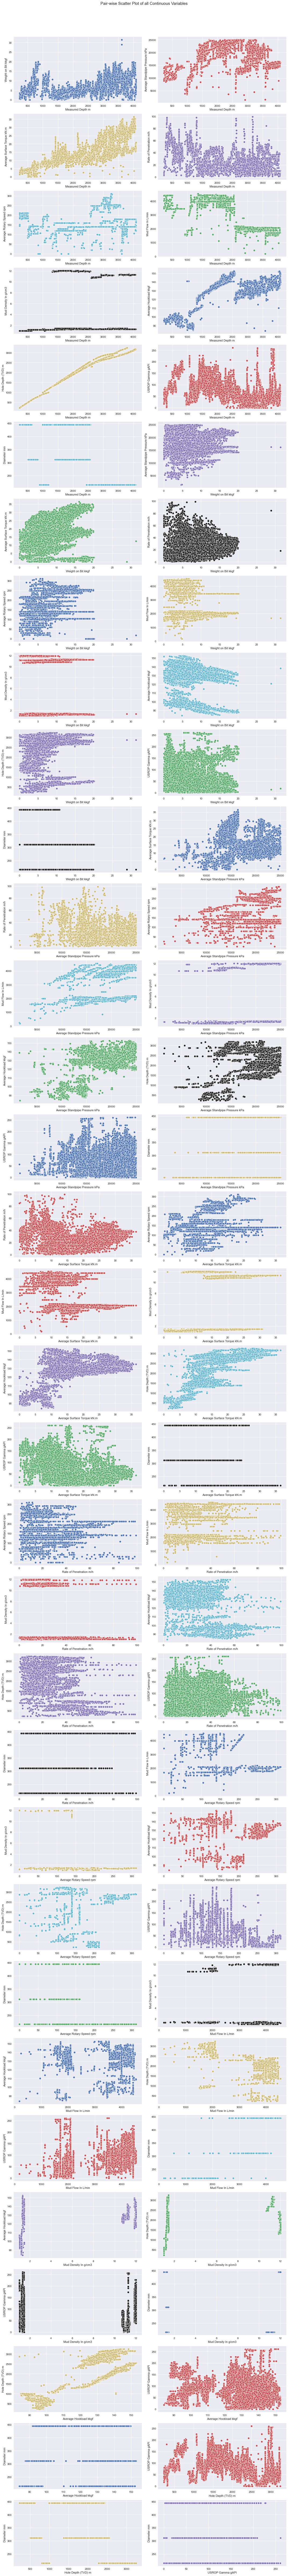

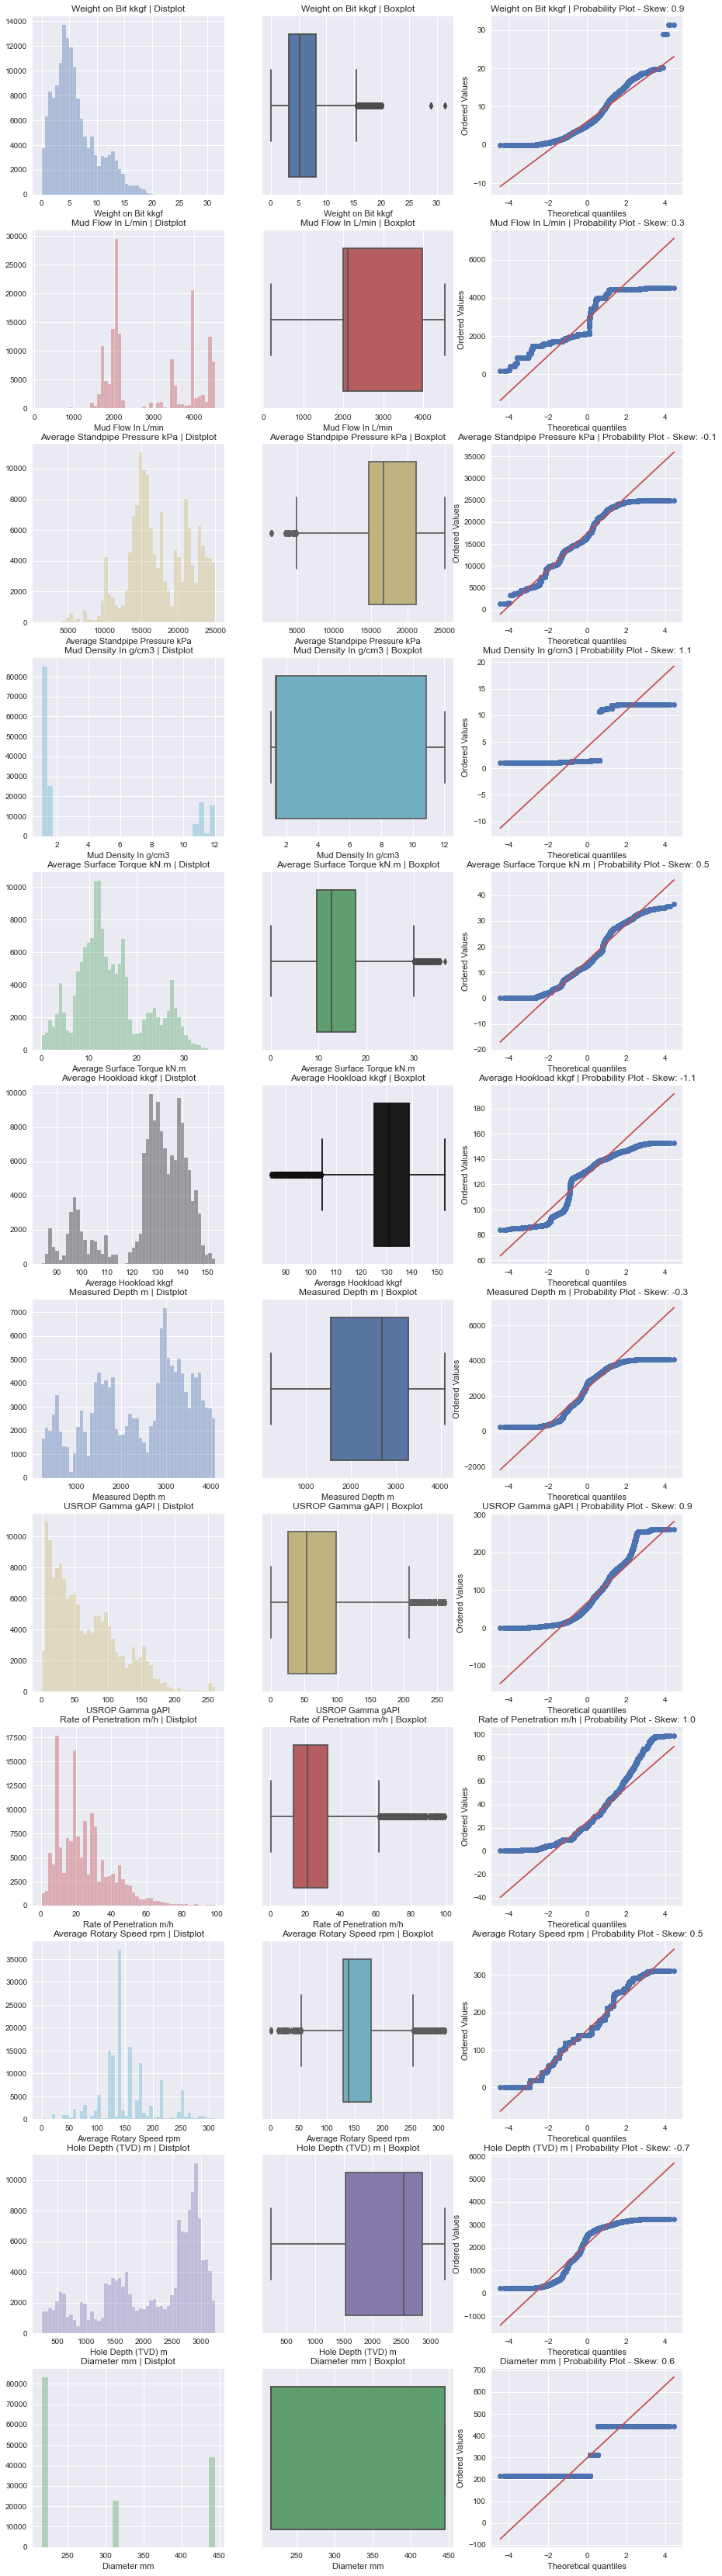

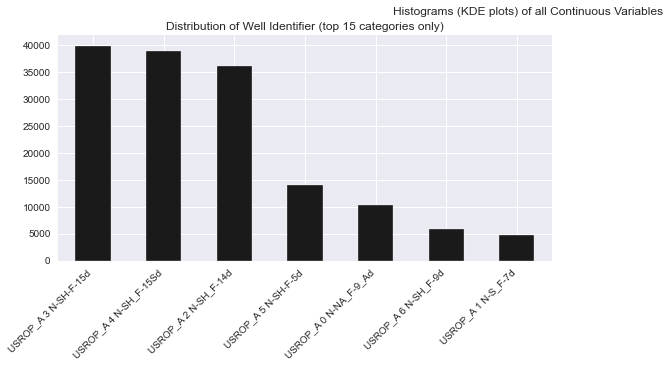

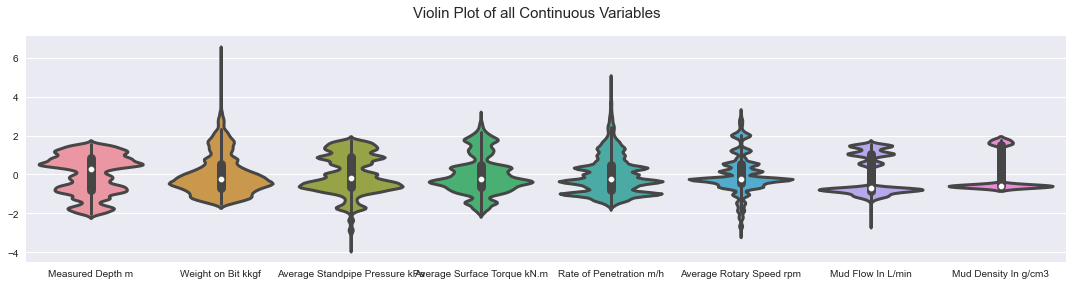

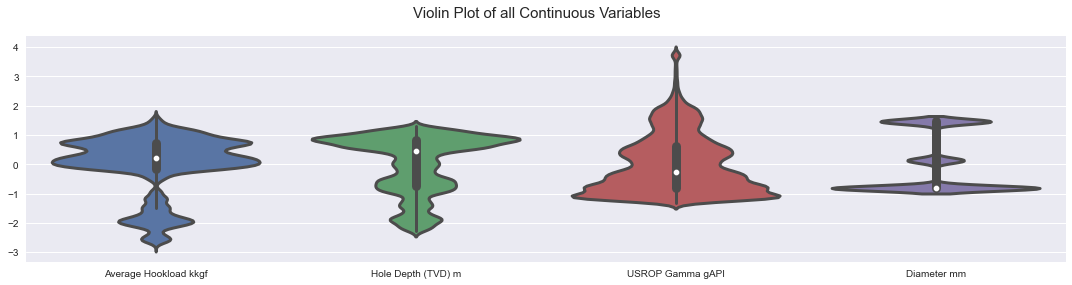

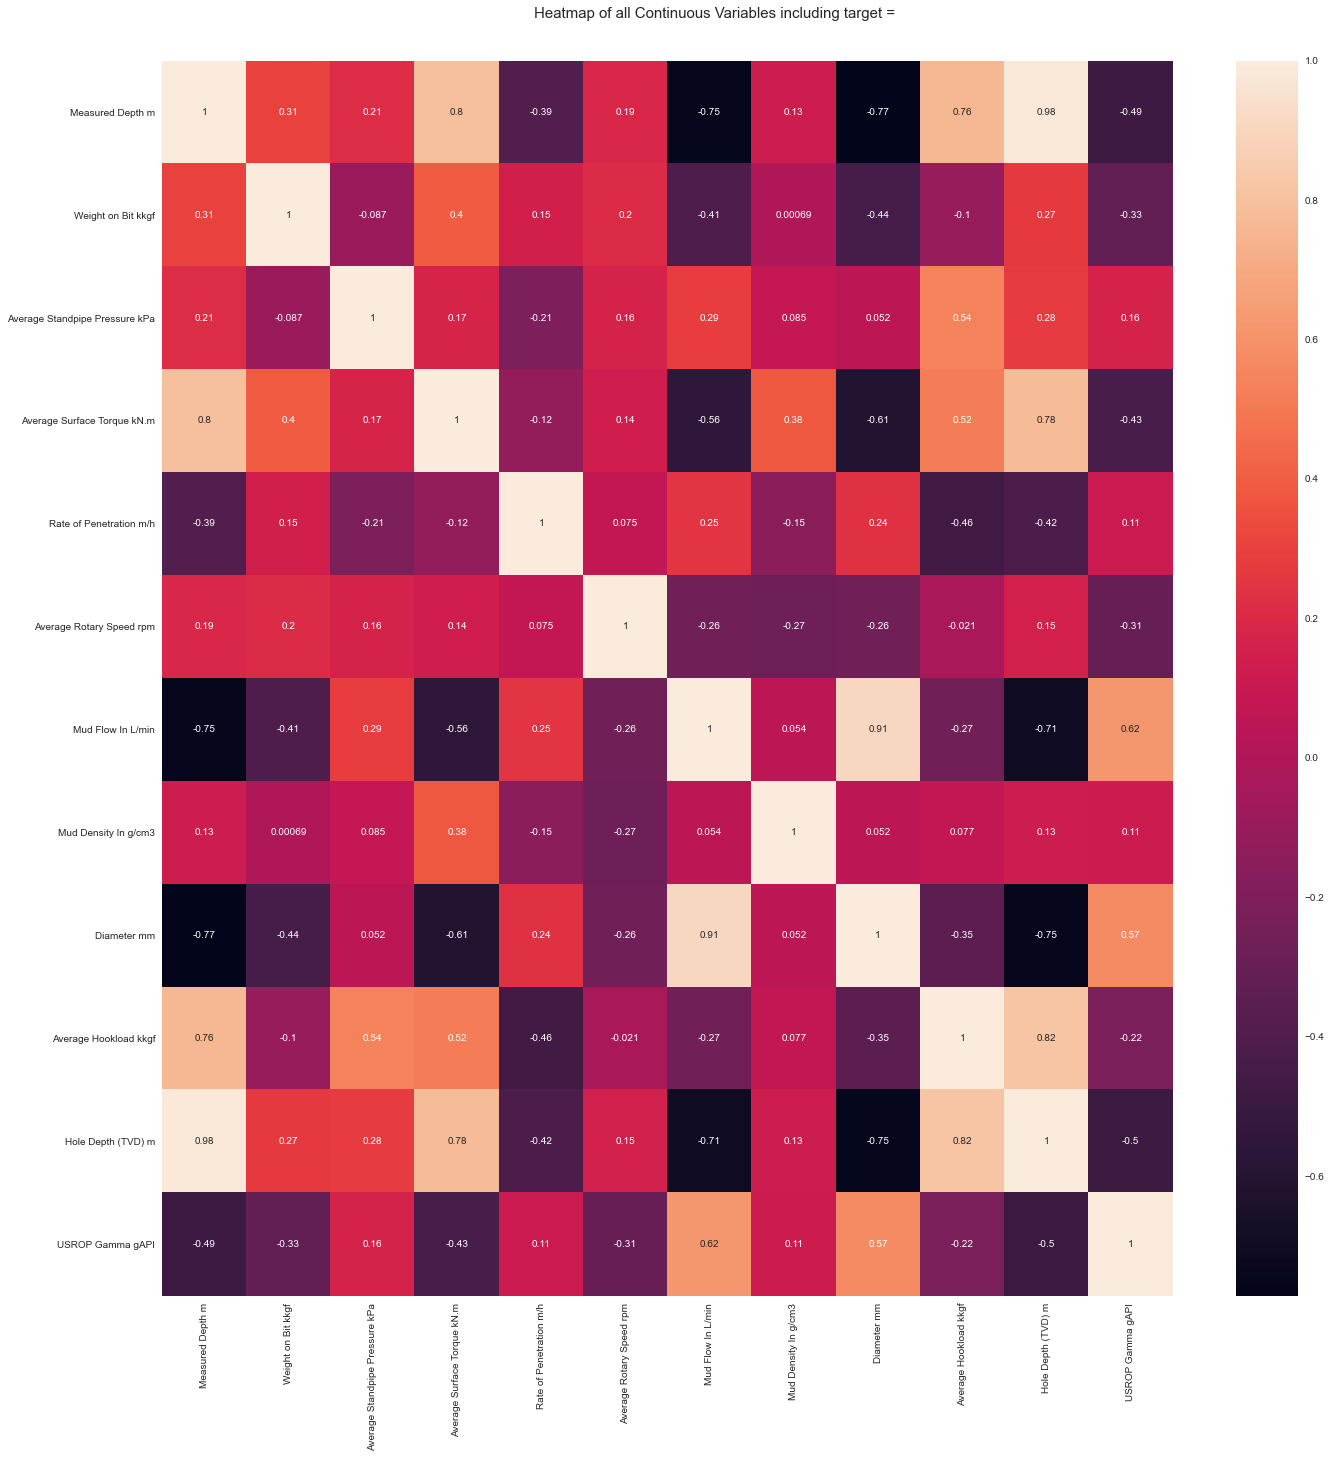

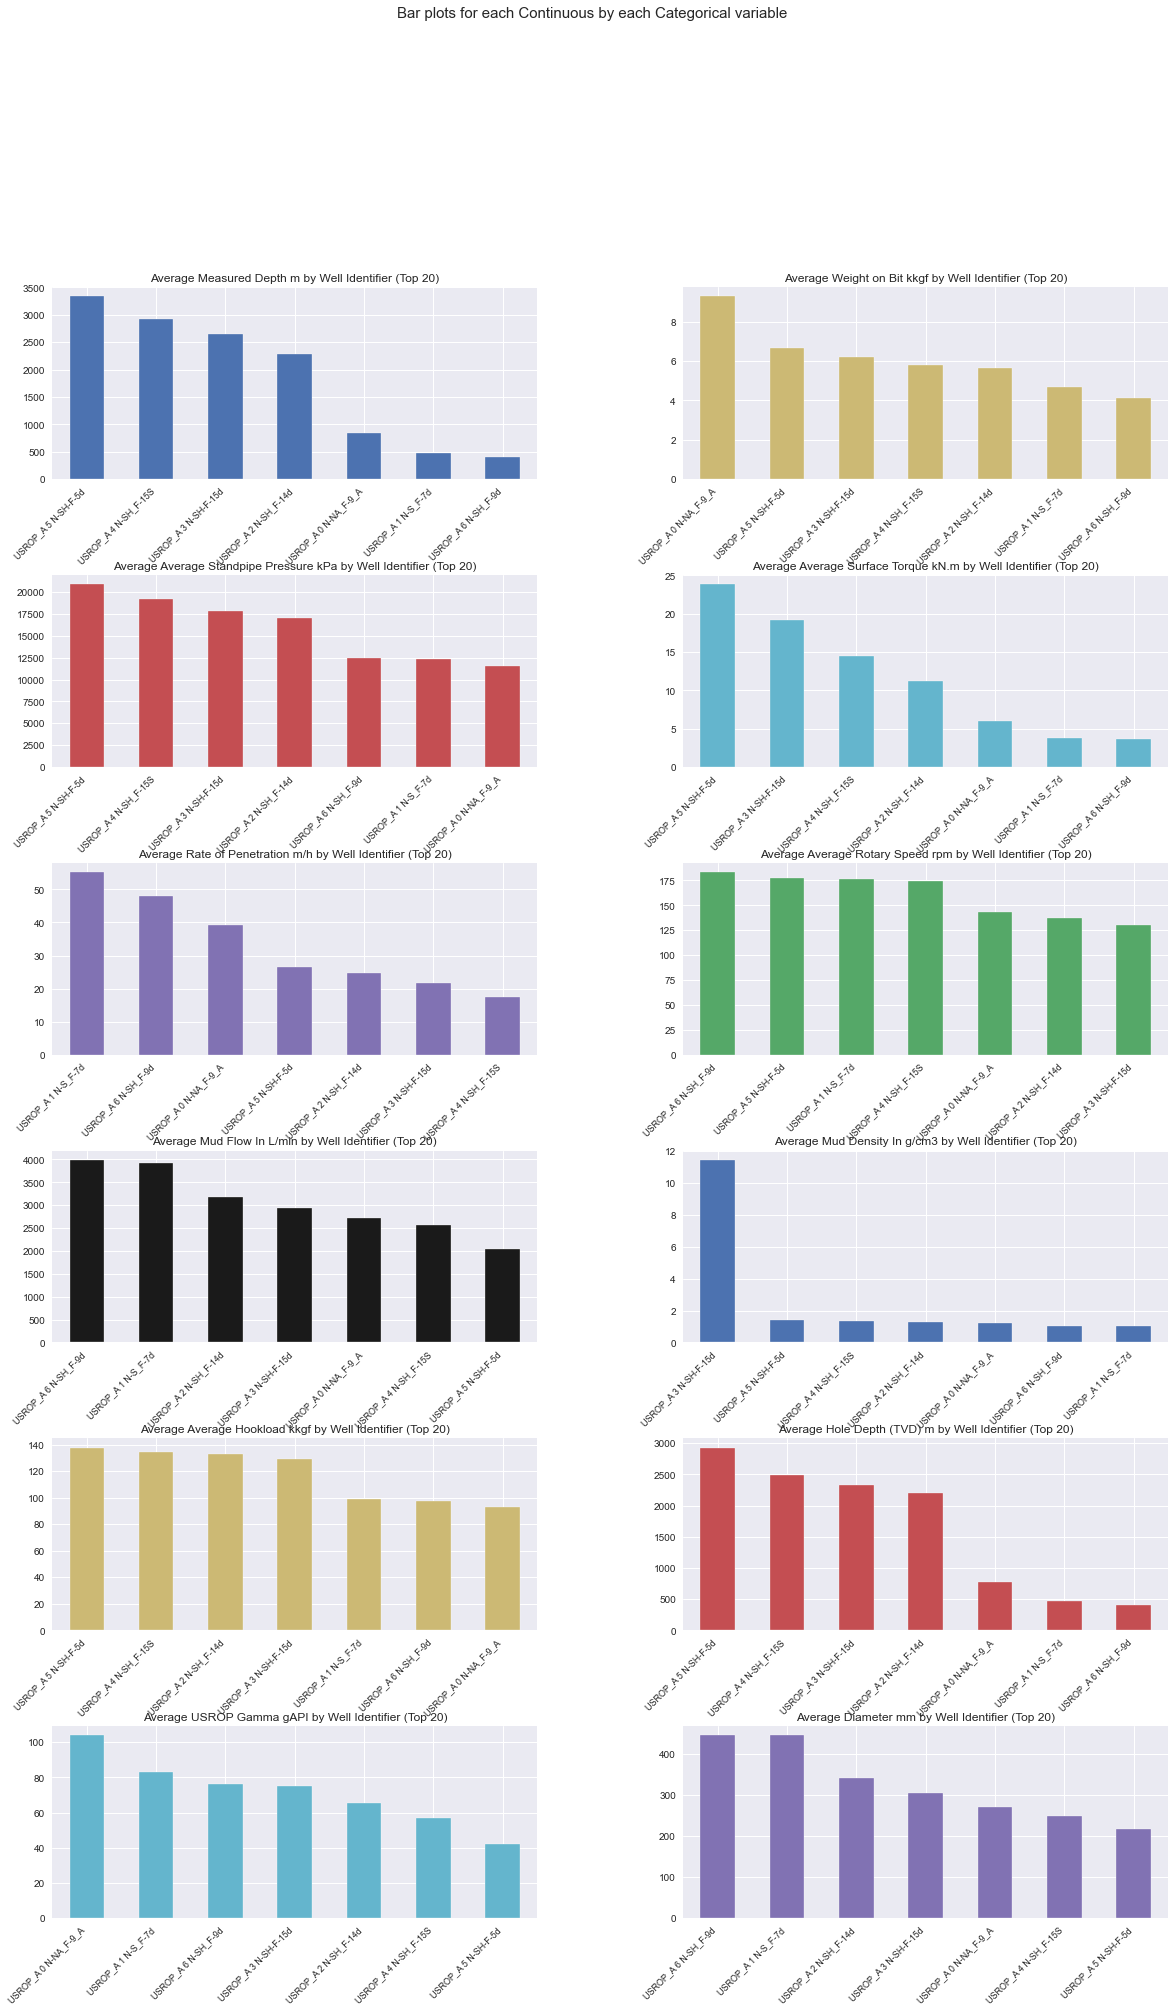

Time to run AutoViz (in seconds) = 58.641

 ###################### VISUALIZATION Completed ########################


Well Identifier  Measured Depth m  Weight on Bit kkgf  \
61605    USROP_A 2 N-SH_F-14d          3182.508           12.440538   
8373    USROP_A 0 N-NA_F-9_Ad           971.047            3.324832   
43306    USROP_A 2 N-SH_F-14d          2240.463            5.282130   
61291    USROP_A 2 N-SH_F-14d          3168.649           11.634962   
169535  USROP_A 4 N-SH_F-15Sd          3994.130            3.880936   
...                       ...               ...                 ...   
155730  USROP_A 4 N-SH_F-15Sd          3522.019           14.655569   
163144  USROP_A 4 N-SH_F-15Sd          3779.986            4.192101   
45404    USROP_A 2 N-SH_F-14d          2333.844            4.425568   
175162    USROP_A 5 N-SH-F-5d          2949.175            6.312044   
176542    USROP_A 5 N-SH-F-5d          2995.251            4.486752   

        Average Standpipe Pressure kPa  Average Surface Torque kN.m  \
61605                     17603.999330                    13.450000   
8373                       5657.355202                     8.948398   
43306                     16363.999940                     9.530000   
61291                     17597.999580                    12.820000   
169535                    15631.883370                    17.262274   
...                                ...                          ...   
155730                    22564.334300                    19.320406   
163144                    15192.459800                    16.884001   
45404                     20542.999270                     9.649999   
175162                    22725.000000                    21.210000   
176542                    21508.000190                    19.590001   

        Rate of Penetration m/h  Average Rotary Speed rpm  Mud Flow In L/min  \
61605                 29.360001                169.470001        1940.489990   
8373                  17.739360                140.410000        1595.134763   
43306                  9.370000                119.580002        3964.290039   
61291                 29.180000                169.949997        1940.359984   
169535                10.048037                180.055000        1705.918630   
...                         ...                       ...                ...   
155730                20.732496                251.690000        2016.072577   
163144                 9.979762                179.500000        1705.918630   
45404                 17.810000                 55.000000        3250.330080   
175162                17.990000                262.570007        2111.500001   
176542                 5.190000                274.160004        2111.540039   

        Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
61605               1.380000       215.90             138.824165   
8373                1.198264       215.90              94.406180   
43306               1.310000       444.50             146.125336   
61291               1.380000       215.90             138.385694   
169535              1.320000       215.90             146.734410   
...                      ...          ...                    ...   
155730              1.330000       215.90             131.310455   
163144              1.310000       215.90             139.367163   
45404               1.290000       311.15             143.647418   
175162              1.300000       215.90             131.992069   
176542              1.300000       215.90             135.193977   

        Hole Depth (TVD) m  USROP Gamma gAPI  
61605          2920.405843            42.548  
8373            889.086055            54.490  
43306          2239.380840            78.722  
61291          2917.141435            16.523  
169535         3103.407458            14.170  
...                    ...               ...  
155730         2841.286774            24.750  
163144         2963.414342            51.293  
45404          2331.610272            82.103  
175162         2632.220186             5.010  
176542       

In [18]:
AV.AutoViz('tech_challenge2021_train.csv')

<AxesSubplot:xlabel='Average Hookload kkgf', ylabel='Density'>

<AxesSubplot:xlabel='Average Hookload kkgf', ylabel='Density'>

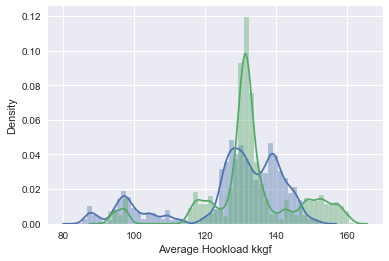

In [19]:
sns.distplot(data_train['Average Hookload kkgf'])
sns.distplot(data_test['Average Hookload kkgf'])

<AxesSubplot:xlabel='Average Standpipe Pressure kPa', ylabel='Density'>

<AxesSubplot:xlabel='Average Standpipe Pressure kPa', ylabel='Density'>

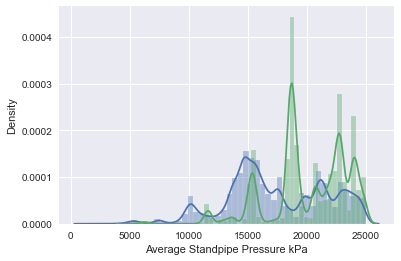

In [20]:
sns.distplot(data_train['Average Standpipe Pressure kPa'])
sns.distplot(data_test['Average Standpipe Pressure kPa'])

<AxesSubplot:xlabel='Average Surface Torque kN.m', ylabel='Density'>

<AxesSubplot:xlabel='Average Surface Torque kN.m', ylabel='Density'>

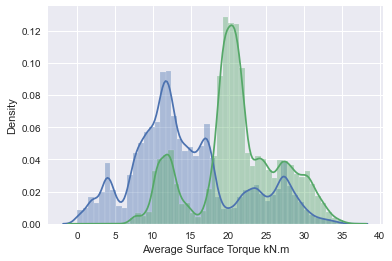

In [21]:
sns.distplot(data_train['Average Surface Torque kN.m'])
sns.distplot(data_test['Average Surface Torque kN.m'])

<AxesSubplot:xlabel='Average Rotary Speed rpm', ylabel='Density'>

<AxesSubplot:xlabel='Average Rotary Speed rpm', ylabel='Density'>

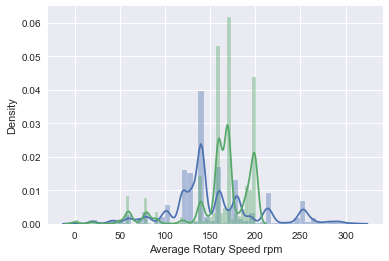

In [22]:
sns.distplot(data_train['Average Rotary Speed rpm'])
sns.distplot(data_test['Average Rotary Speed rpm'])

In [23]:
# Correlation Check
df_train.corr()

Measured Depth m  Weight on Bit kkgf  \
Measured Depth m                        1.000000            0.303758   
Weight on Bit kkgf                      0.303758            1.000000   
Average Standpipe Pressure kPa          0.211211           -0.086641   
Average Surface Torque kN.m             0.795906            0.395223   
Rate of Penetration m/h                -0.393889            0.146947   
Average Rotary Speed rpm                0.189465            0.204571   
Mud Flow In L/min                      -0.748654           -0.408389   
Mud Density In g/cm3                    0.126179           -0.001711   
Diameter mm                            -0.771158           -0.443644   
Average Hookload kkgf                   0.762159           -0.102894   
Hole Depth (TVD) m                      0.983941            0.268754   
USROP Gamma gAPI                       -0.490107           -0.326573   

                                Average Standpipe Pressure kPa  \
Measured Depth m                                      0.211211   
Weight on Bit kkgf                                   -0.086641   
Average Standpipe Pressure kPa                        1.000000   
Average Surface Torque kN.m                           0.169800   
Rate of Penetration m/h                              -0.210715   
Average Rotary Speed rpm                              0.161257   
Mud Flow In L/min                                     0.287266   
Mud Density In g/cm3                                  0.084552   
Diameter mm                                           0.053737   
Average Hookload kkgf                                 0.540892   
Hole Depth (TVD) m                                    0.276292   
USROP Gamma gAPI                                      0.163643   

                                Average Surface Torque kN.m  \
Measured Depth m                                   0.795906   
Weight on Bit kkgf                                 0.395223   
Average Standpipe Pressure kPa                     0.169800   
Average Surface Torque kN.m                        1.000000   
Rate of Penetration m/h                           -0.121465   
Average Rotary Speed rpm                           0.135598   
Mud Flow In L/min                                 -0.555432   
Mud Density In g/cm3                               0.383917   
Diameter mm                                       -0.608929   
Average Hookload kkgf                              0.518171   
Hole Depth (TVD) m                                 0.777057   
USROP Gamma gAPI                                  -0.431413   

                                Rate of Penetration m/h  \
Measured Depth m                              -0.393889   
Weight on Bit kkgf                             0.146947   
Average Standpipe Pressure kPa                -0.210715   
Average Surface Torque kN.m                   -0.121465   
Rate of Penetration m/h                        1.000000   
Average Rotary Speed rpm                       0.076670   
Mud Flow In L/min                              0.251701   
Mud Density In g/cm3                          -0.152639   
Diameter mm                                    0.238104   
Average Hookload kkgf                         -0.461024   
Hole Depth (TVD) m                            -0.418602   
USROP Gamma gAPI                               0.110883   

                                Average Rotary Speed rpm  Mud Flow In L/min  \
Measured Depth m                                0.189465          -0.748654   
Weight on Bit kkgf                              0.204571          -0.408389   
Average Standpipe Pressure kPa                  0.161257           0.287266   
Average Surface Torque kN.m                     0.135598          -0.555432   
Rate of Penetration m/h                         0.076670           0.251701   
Average Rotary Speed rpm                        1.000000          -0.265543   
Mud Flow In L/min                              -0.265543           1.000000   
Mud Density In g

<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

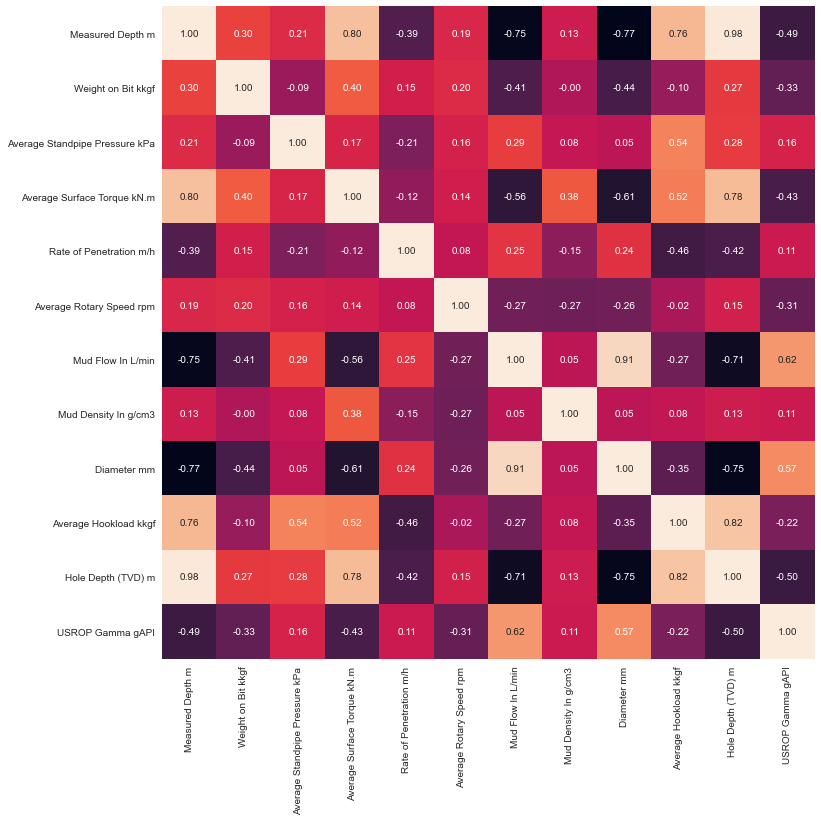

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(), 
            cbar = False, 
            xticklabels = df_train.corr().columns, 
            yticklabels = df_train.corr().columns, 
            square = True, 
            annot = True, 
            fmt = '0.2f')

In [25]:
corr_matrix = df_train.corr().abs()
high_corr_var = np.where(corr_matrix > 0.75)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Measured Depth m', 'Average Surface Torque kN.m'),
 ('Measured Depth m', 'Diameter mm'),
 ('Measured Depth m', 'Average Hookload kkgf'),
 ('Measured Depth m', 'Hole Depth (TVD) m'),
 ('Average Surface Torque kN.m', 'Hole Depth (TVD) m'),
 ('Mud Flow In L/min', 'Diameter mm'),
 ('Average Hookload kkgf', 'Hole Depth (TVD) m')]

In [26]:
# Dropping highly correlated columns
df_train.drop(['Measured Depth m', 'Mud Flow In L/min', 'Hole Depth (TVD) m'], axis=1, inplace=True)
df_train.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0            5.842270                     9440.922214   
1            6.241431                     9499.941336   
2            6.241431                     9499.941336   
3            6.368437                     9313.024466   
4            6.368437                     9313.024466   

   Average Surface Torque kN.m  Rate of Penetration m/h  \
0                     0.244047                42.864024   
1                     0.244047                42.315384   
2                     0.244047                42.315384   
3                     0.216931                42.894504   
4                     0.216931                42.894504   

   Average Rotary Speed rpm  Mud Density In g/cm3  Diameter mm  \
0                      84.0                  1.21       311.15   
1                      84.0                  1.21       311.15   
2                      84.0                  1.21       311.15   
3                      84.0                  1.21       311.15   
4                      84.0                  1.21       311.15   

   Average Hookload kkgf  USROP Gamma gAPI  
0              93.780222            150.88  
1              93.979803            150.88  
2              93.979803            150.88  
3              94.079593            146.26  
4              94.079593            146.26

In [27]:
df_test.drop(['Measured Depth m', 'Mud Flow In L/min', 'Hole Depth (TVD) m'], axis=1, inplace=True)
df_test.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0           10.656246                      23053.9448   
1           10.656246                      23053.9448   
2           10.656246                      23053.9448   
3           10.656246                      23053.9448   
4           10.656246                      23053.9448   

   Average Surface Torque kN.m  Average Rotary Speed rpm  \
0                    22.631313                   169.781   
1                    22.631313                   169.781   
2                    22.631313                   169.781   
3                    22.631313                   169.781   
4                    22.631313                   169.781   

   Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  USROP Gamma gAPI  
0                  1.31        254.0             136.662392            20.774  
1                  1.31        254.0             136.662392            20.774  
2                  1.31        254.0             136.662392            20.774  
3                  1.31        254.0             136.662392            20.774  
4                  1.31        254.0             136.662392            20.774

In [28]:
# Zero Variance Check
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_train)

VarianceThreshold(threshold=0)

In [29]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

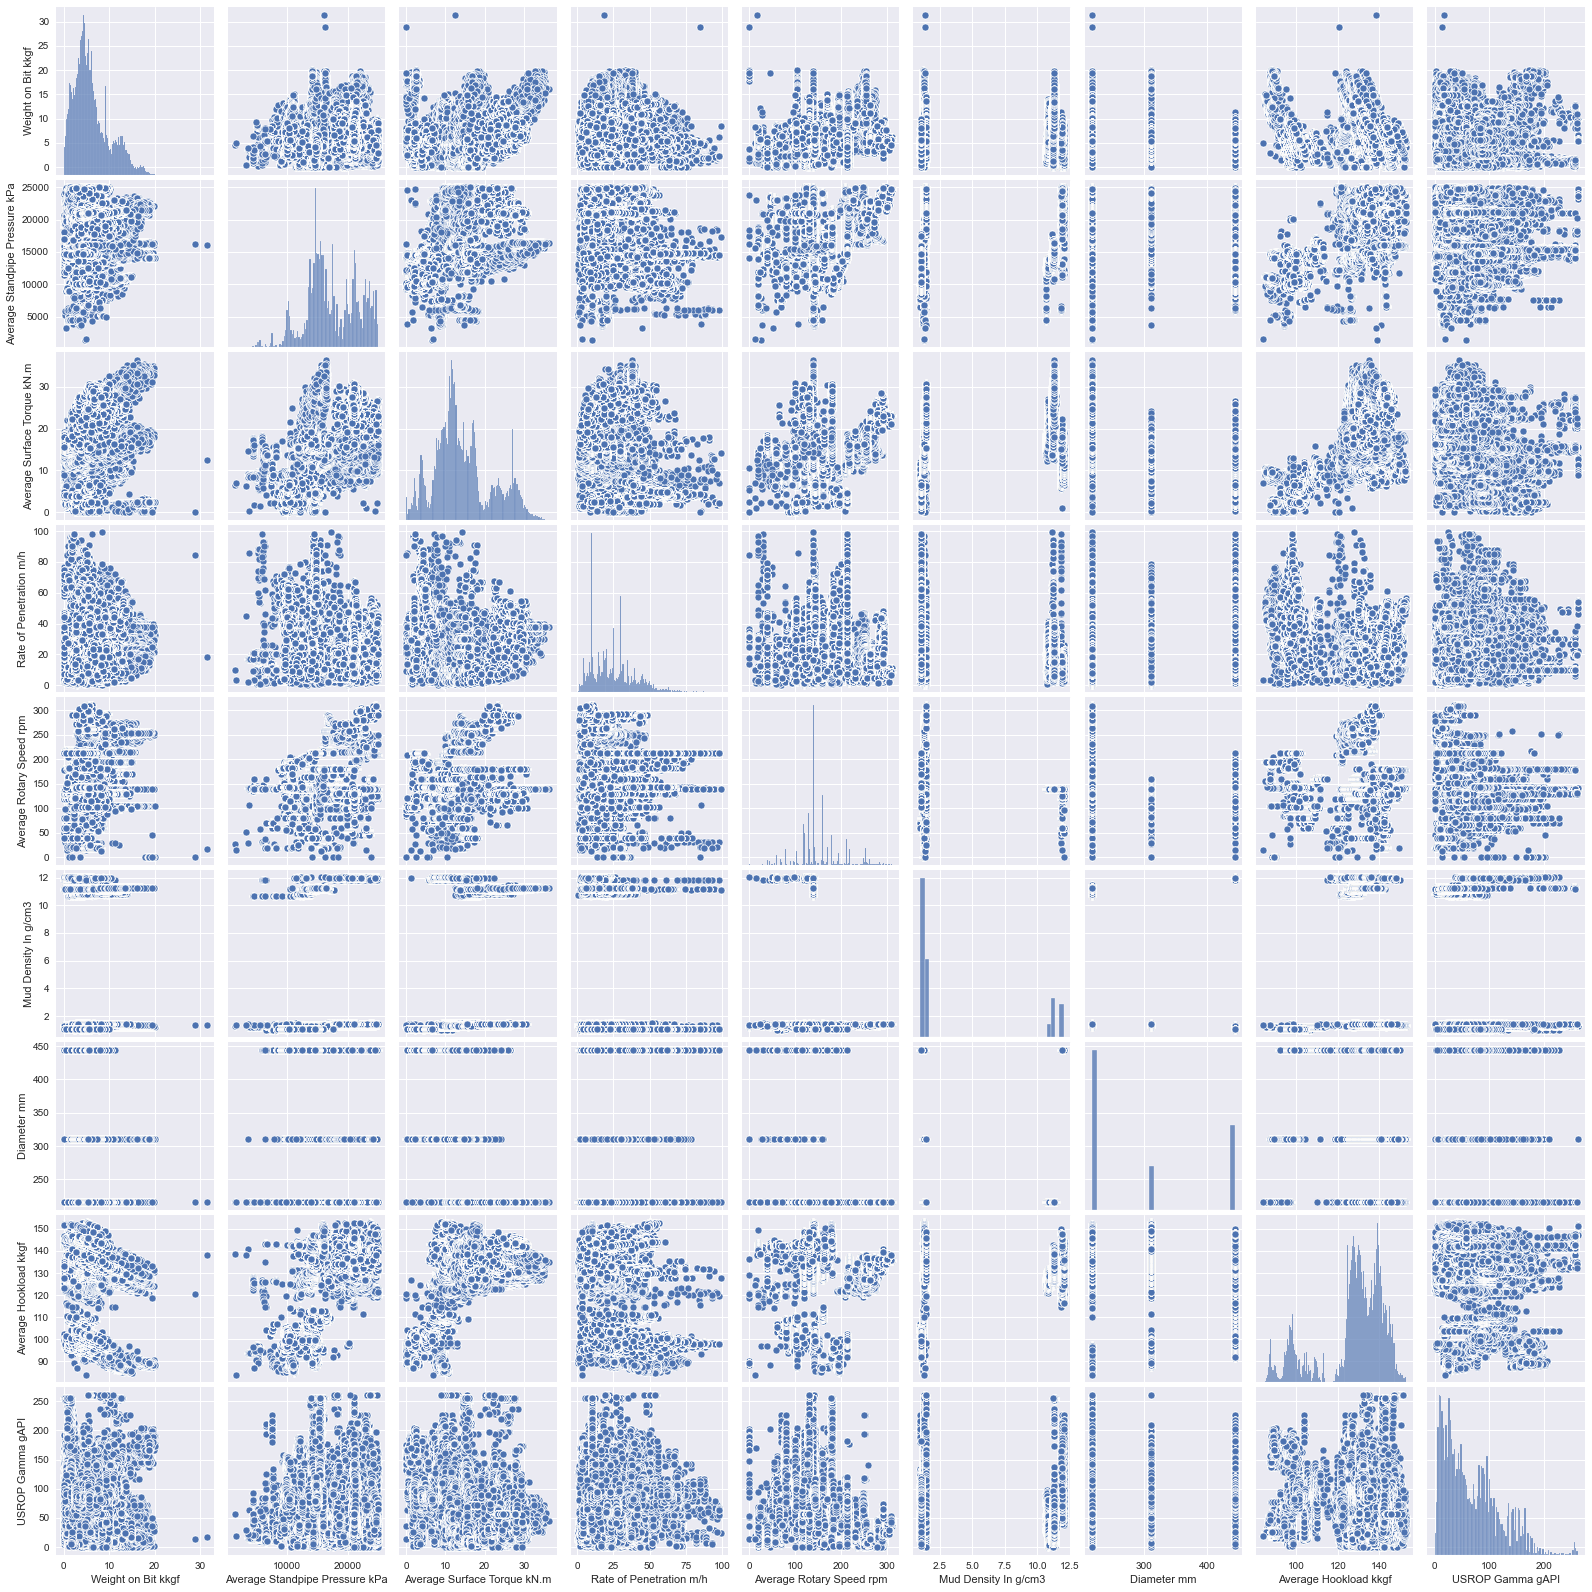

In [30]:
# Pair Plot
sns.pairplot(df_train)

<AxesSubplot:xlabel='Rate of Penetration m/h'>

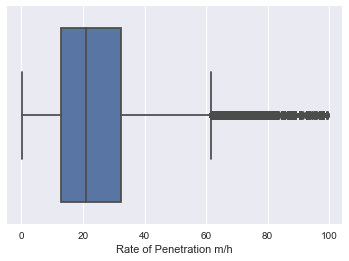

In [31]:
sns.boxplot(df_train['Rate of Penetration m/h'])

In [32]:
df_train.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0            5.842270                     9440.922214   
1            6.241431                     9499.941336   
2            6.241431                     9499.941336   
3            6.368437                     9313.024466   
4            6.368437                     9313.024466   

   Average Surface Torque kN.m  Rate of Penetration m/h  \
0                     0.244047                42.864024   
1                     0.244047                42.315384   
2                     0.244047                42.315384   
3                     0.216931                42.894504   
4                     0.216931                42.894504   

   Average Rotary Speed rpm  Mud Density In g/cm3  Diameter mm  \
0                      84.0                  1.21       311.15   
1                      84.0                  1.21       311.15   
2                      84.0                  1.21       311.15   
3                      84.0                  1.21       311.15   
4                      84.0                  1.21       311.15   

   Average Hookload kkgf  USROP Gamma gAPI  
0              93.780222            150.88  
1              93.979803            150.88  
2              93.979803            150.88  
3              94.079593            146.26  
4              94.079593            146.26

In [33]:
df_test.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0           10.656246                      23053.9448   
1           10.656246                      23053.9448   
2           10.656246                      23053.9448   
3           10.656246                      23053.9448   
4           10.656246                      23053.9448   

   Average Surface Torque kN.m  Average Rotary Speed rpm  \
0                    22.631313                   169.781   
1                    22.631313                   169.781   
2                    22.631313                   169.781   
3                    22.631313                   169.781   
4                    22.631313                   169.781   

   Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  USROP Gamma gAPI  
0                  1.31        254.0             136.662392            20.774  
1                  1.31        254.0             136.662392            20.774  
2                  1.31        254.0             136.662392            20.774  
3                  1.31        254.0             136.662392            20.774  
4                  1.31        254.0             136.662392            20.774

In [34]:
df_train.columns

Index(['Weight on Bit kkgf', 'Average Standpipe Pressure kPa',
       'Average Surface Torque kN.m', 'Rate of Penetration m/h',
       'Average Rotary Speed rpm', 'Mud Density In g/cm3', 'Diameter mm',
       'Average Hookload kkgf', 'USROP Gamma gAPI'],
      dtype='object')

In [35]:
x = df_train.drop(['Rate of Penetration m/h'], axis=1)
y = df_train['Rate of Penetration m/h']

In [36]:
# Concatinating train and test data before scaling
x_sc = pd.concat([x, df_test], axis = 0)
x_sc

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0                 5.842270                     9440.922214   
1                 6.241431                     9499.941336   
2                 6.241431                     9499.941336   
3                 6.368437                     9313.024466   
4                 6.368437                     9313.024466   
...                    ...                             ...   
114294            1.238761                    23439.541000   
114295            1.238761                    23439.541000   
114296            0.943019                    23458.087900   
114297            0.943019                    23458.087900   
114298            0.943019                    23458.087900   

        Average Surface Torque kN.m  Average Rotary Speed rpm  \
0                          0.244047                     84.00   
1                          0.244047                     84.00   
2                          0.244047                     84.00   
3                          0.216931                     84.00   
4                          0.216931                     84.00   
...                             ...                       ...   
114294                    18.391670                    198.65   
114295                    18.391670                    198.65   
114296                    18.281849                    199.00   
114297                    18.281849                    199.00   
114298                    18.281849                    199.00   

        Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
0                       1.21       311.15              93.780222   
1                       1.21       311.15              93.979803   
2                       1.21       311.15              93.979803   
3                       1.21       311.15              94.079593   
4                       1.21       311.15              94.079593   
...                      ...          ...                    ...   
114294                  1.48       254.00             140.390921   
114295                  1.48       254.00             140.390921   
114296                  1.48       254.00             140.475743   
114297                  1.48       254.00             140.475743   
114298                  1.48       254.00             140.475743   

        USROP Gamma gAPI  
0                 150.88  
1                 150.88  
2                 150.88  
3                 146.26  
4                 146.26  
...                  ...  
114294             53.97  
114295             53.97  
114296             53.97  
114297             53.97  
114298             53.97  

[313227 rows x 8 columns]

In [37]:
# Standard Scaler
scaler = StandardScaler()

In [38]:
x_sc = scaler.fit_transform(x_sc)

In [39]:
cols = ['Weight on Bit kkgf', 'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
        'Average Rotary Speed rpm', 'Mud Density In g/cm3', 'Diameter mm', 'Average Hookload kkgf', 
        'USROP Gamma gAPI']

In [40]:
x_sc = pd.DataFrame(x_sc, columns = cols)
x_sc.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
0           -0.159134                       -2.179211   
1           -0.062327                       -2.164923   
2           -0.062327                       -2.164923   
3           -0.031525                       -2.210175   
4           -0.031525                       -2.210175   

   Average Surface Torque kN.m  Average Rotary Speed rpm  \
0                    -2.223913                 -1.556113   
1                    -2.223913                 -1.556113   
2                    -2.223913                 -1.556113   
3                    -2.227540                 -1.556113   
4                    -2.227540                 -1.556113   

   Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  USROP Gamma gAPI  
0             -0.477379     0.211024              -2.388968          1.815733  
1             -0.477379     0.211024              -2.375595          1.815733  
2             -0.477379     0.211024              -2.375595          1.815733  
3             -0.477379     0.211024              -2.368908          1.727115  
4             -0.477379     0.211024              -2.368908          1.727115

In [41]:
abs(x_sc.describe())

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
count        3.132270e+05                    3.132270e+05   
mean         1.012835e-14                    1.638718e-14   
std          1.000002e+00                    1.000002e+00   
min          1.575602e+00                    4.117995e+00   
25%          7.129350e-01                    7.544526e-01   
50%          1.553941e-01                    6.108502e-02   
75%          5.247876e-01                    8.848002e-01   
max          6.042037e+00                    1.587588e+00   

       Average Surface Torque kN.m  Average Rotary Speed rpm  \
count                 3.132270e+05              3.132270e+05   
mean                  8.706504e-14              9.676339e-14   
std                   1.000002e+00              1.000002e+00   
min                   2.255470e+00              3.378688e+00   
25%                   7.548621e-01              4.174368e-01   
50%                   2.323873e-02              8.051674e-02   
75%                   6.978655e-01              5.194755e-01   
max                   2.633022e+00              3.374172e+00   

       Mud Density In g/cm3   Diameter mm  Average Hookload kkgf  \
count          3.132270e+05  3.132270e+05           3.132270e+05   
mean           2.183664e-13  1.138960e-12           2.926310e-14   
std            1.000002e+00  1.000002e+00           1.000002e+00   
min            5.351276e-01  7.890370e-01           3.041082e+00   
25%            4.537544e-01  7.890370e-01           2.133079e-01   
50%            4.511295e-01  7.890370e-01           1.317999e-01   
75%            4.117553e-01  2.110241e-01           5.991523e-01   
max            2.359498e+00  1.611109e+00           2.180362e+00   

       USROP Gamma gAPI  
count      3.132270e+05  
mean       2.413374e-14  
std        1.000002e+00  
min        1.078366e+00  
25%        8.678498e-01  
50%        3.050080e-01  
75%        6.466037e-01  
max        7.945746e+00

In [42]:
x_scaled = x_sc.iloc[:198928,:]
df_test_scaled = x_sc.iloc[198928:,:]

In [43]:
df_test_scaled.head()

Weight on Bit kkgf  Average Standpipe Pressure kPa  \
198928            1.008384                        1.116475   
198929            1.008384                        1.116475   
198930            1.008384                        1.116475   
198931            1.008384                        1.116475   
198932            1.008384                        1.116475   

        Average Surface Torque kN.m  Average Rotary Speed rpm  \
198928                     0.770774                  0.305106   
198929                     0.770774                  0.305106   
198930                     0.770774                  0.305106   
198931                     0.770774                  0.305106   
198932                     0.770774                  0.305106   

        Mud Density In g/cm3  Diameter mm  Average Hookload kkgf  \
198928             -0.451129    -0.389013               0.484366   
198929             -0.451129    -0.389013               0.484366   
198930             -0.451129    -0.389013               0.484366   
198931             -0.451129    -0.389013               0.484366   
198932             -0.451129    -0.389013               0.484366   

        USROP Gamma gAPI  
198928         -0.679891  
198929         -0.679891  
198930         -0.679891  
198931         -0.679891  
198932         -0.679891

In [44]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [45]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

 62%|██████████████████████████████████████████████████▊                               | 26/42 [01:23<00:10,  1.51it/s]

In [ ]:
# Linear Regression OLS method
x_endog = sm.add_constant(x_test)

In [ ]:
linreg = sm.OLS(y_test, x_endog)
linreg.fit()

In [ ]:
linreg.fit().summary()

In [ ]:
# Linear Regression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
print('MAE :', metrics.mean_absolute_error(y_test, pred))
print('MSE :', metrics.mean_squared_error(y_test, pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
# Random Forest Regressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

In [ ]:
print('Training Score: ', regressor.score(x_train, y_train)*100, '%')
print('Testing Score: ', regressor.score(x_test, y_test)*100, '%')

In [ ]:
pred_rf = regressor.predict(x_test)

In [ ]:
print('MAE :', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE :', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

In [ ]:
print(dir(regressor))

In [ ]:
regressor.get_params()

In [ ]:
regressor.feature_importances_

In [ ]:
var_df = pd.DataFrame([regressor.feature_importances_], columns = x.columns)
var_df

In [ ]:
# Hyperparameter Tunning
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators': [50, 80, 100, 120, 150, 200],
              'max_depth': [6, 8, 10, 20, 50, 80, 100],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ["mse", "mae"]}

cv_rf = GridSearchCV(regressor, cv = 10,
                     param_grid = param_dist,
                     n_jobs = -1)

cv_rf.fit(x, y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
cv_rf.best_params_

In [ ]:
cv_rf.best_estimator_

In [ ]:
# Set best parameters given by grid search 
regressor.set_params(bootstrap = True, 
                    criterion = 'entropy', 
                    max_depth = 10, 
                    max_features = None,
                    n_estimators = 80)

In [ ]:
# Retrain the model
regressor.fit(x, y)

In [ ]:
# Predicting on test dataset
predict = pd.DataFrame(regressor.predict(df_test))

In [ ]:
##Create Sample Submission file and Submit
# sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([test_data['customer_id'], predict], axis=1)
datasets.columns = ['customer_id', 'churn_risk_score']
datasets.to_csv('submission.csv', index=False)